## NLTK Inaugural

In [2]:
import nltk
nltk.download(['brown', 'inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\KBS\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\KBS\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [3]:
brown = nltk.corpus.brown

In [6]:
# cfd (눈 감고도 쓸 수 있어야 함)
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre) # fileids도 정해줄 수 있기 때문에, categories 꼭 써주기
)

modals = ['can', 'could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


In [16]:
# modals의 빈도수가 포함된 cfd ( word -> modal_verb)

cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'would', 'will', 'might', 'may']
    
    for word in brown.words(categories=genre) 
        if word.lower() == modal # modal이 포함된 것만 뽑기
)
cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


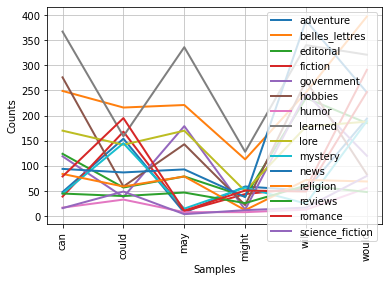

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
import matplotlib.pyplot as plt
cfd1.plot()

### Inaugural
- 연설문 코퍼스

In [12]:
inaugural = nltk.corpus.inaugural

In [14]:
inaugural.fileids() # inaugural은 fileids만 있음 / 연도-대통령이름.txt의 형태

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [21]:
# ['america', 'citizen']이 각 대통령마다 얼마나 쓰였는지, 빈도수를 cfd로 만드시오
cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4]) # x축 y축 때문에 순서 바꿈 / [:-4]는 마지막 출력값에서 txt빼기 위해 작성
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileids=fileid)
        # if word.lower() == modal
        # if targer_word() in word.lower()
        if word.lower().startswith(target_word)
        # 셋 다 맞음, 첫번째는 포함한 단어를 좁게 찾은 것
)

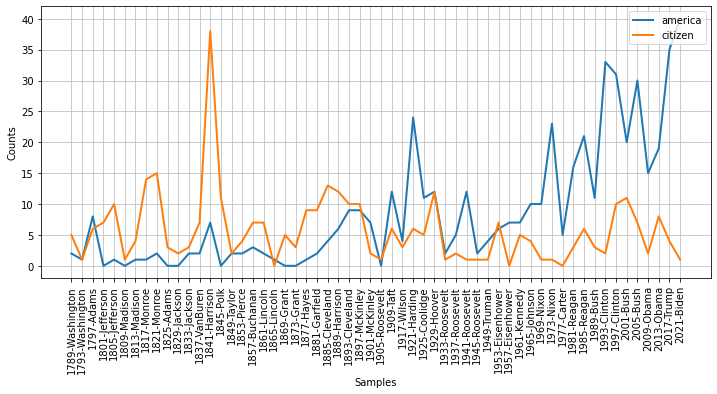

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
plt.figure(figsize=(12, 5)) # 그림 사이즈가 작아서 넣은 코드
cfd2.plot()

## Ch07. Tuple & List
- 불변 객체 vs. 가변 객체

In [25]:
# 1. 생성
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

In [26]:
# 요소가 여러 개일 때(tuple)
alphabetT = ('a', 'b')
alphabetT = 'a', 'b' # 괄호 없이도 가능해서 이렇게 많이 씀
alphabetT

('a', 'b')

In [27]:
# 요소가 여러 개일 때(list)
alphabetL = ['a', 'b']
alphabetL

['a', 'b']

In [28]:
# 요소가 하나일 때 주의할 점(tuple)
alphaT = ('a')
type(alphaT) # str으로 인식함

str

In [31]:
alphaT = ('b',) # 쉼표를 넣어줘야 tuple로 인식함 (괄호생략가능)
type(alphaT)

tuple

- packing: 한 변수에 여러 데이터를 할당하는 것
    - list, tuple 자체 / a = [1, 2, 3, 4]
- unpacking: 데이터를 여러 변수에 나누는 것
    - a, b, c = 'kim' 
    - a = 'k', b = 'i', c = 'm'

In [32]:
# umpacking
a, b, c = 'kim' 
a, b, c

('k', 'i', 'm')

In [34]:
# Tuple 값을 교환할 때 편리
pwd = 'abcd'
userId = 'sky'

# pwd = userId로 할 경우 두 값 모두 'abcd'가 되어버림
# 임시변수에 할당해 준 뒤 교환
'''
temp1 = userId
temp2 = pwd

pwd = temp1
userId = temp2
'''

# 하지만 위의 과정을 거치지 않고 아래의 방법으로 바로 교환가능
pwd, userId = userId, pwd
pwd, userId

('sky', 'abcd')

In [37]:
# Tuple 연산 (list도 동일)
('a',) + (1, 2)

('a', 1, 2)

In [36]:
(1, 2) * 3

(1, 2, 1, 2, 1, 2)

In [39]:
# Tuple은 불변객체인데 어떻게 덧셈이 가능한가
x = ('a',) 
y = (1, 2)
id(x), id(x + y)
# 아이디 값 다름 -> 변수 값이 바뀐게 아니라 아예 새로운 변수에 할당된 것

(2816158707088, 2816102013760)

In [41]:
# Tupel 비교
x = 1, 2
y = 1, 6

x < y # 첫 인자부터 비교함 y의 두번째 값이 더 크기때문에 True

True

In [42]:
# Tuple 순회
for i in x:
    print(x)

(1, 2)
(1, 2)


In [44]:
# 그러므로 리스트 컴프리핸션도 가능
# 다만 결과값이 리스트로 바뀌는 것
[i for i in x]

[1, 2]

In [45]:
# tuple comprehension이 있나? NO
# tuple로 변경은 가능함
tuple([i for i in x])
*[i for i in x], # 느림

# 리스트컴프리헨션 사용하는 것이 가장 좋음. 
# 정말 필요한 경우 아니라면 굳이 튜플로 바꿀 필요 X

(1, 2)

In [46]:
# Tuple 형변환
dog = 'dog'

# 1. 각 인자를 하나하나 넣음
tuple(dog)

('d', 'o', 'g')

In [47]:
# 2. 전체를 튜플에 넣음
(dog,)
# 두 방법의 차이 주의할 것

('dog',)

In [49]:
# lsit도 동일
list(dog)

['d', 'o', 'g']

In [50]:
[dog]

['dog']

In [52]:
# Tuple 슬라이싱 가능
dogT = tuple(dog)
dogT[0]

'd'

### 정리
- tuple 장점
    - 변하지 않는 데이터 시퀀스를 만들 수 있다 -> 타인의 접근을 막는다 (만들어 놓은 코드가 변경되면 안 될 때 사용)
    - 메모리 사용이 적다
- list 장점
    - 튜플의 장점이 필요없을 때 전부 리스트를 사용한다 (변경 해야할 가능성이 많기 때문)
    - 데이터를 순차적으로 파악할 때 
    - (set이랑 비교했을 때) 중복 데이터 사용 가능
        - 튜플도 중복 가능

### 리스트 유용한 함수
- 변경, 삭제, 추가
- 리스트 컴프리핸션 업그레이드

In [62]:
num = list(range(5))
num

[0, 1, 2, 3, 4]

In [63]:
# append 추가 함수
# 함수 자체가 할당됨 -> 다시 할당할 필요 X
# 마지막에 1개의 요소 추가 (여러 개 불가능)
# append(list)로 하면, list가 통째로 들어감!
num.append(6)
num

[0, 1, 2, 3, 4, 6]

In [65]:
# insert(index, item) 추가 함수
num.insert(0, 8)
num

[8, 0, 1, 2, 3, 4, 6]

In [67]:
# extend 여러 개 추가 함수
# 리스트를 리스트로 확장하는 것
x = [6, 6, 6]
num.extend(x)
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, 6, 6, 6]

In [69]:
# extend는 num += x 하는 것과 동일
num += x
num

[8, 0, 1, 2, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [70]:
# offset 활용
num[0] = 9
num

[9, 0, 1, 2, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [71]:
# 슬라이스
num[:3] = 2, 2, 2
num

[2, 2, 2, 2, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [72]:
# str 넣었을 때 주의할 것
# unpacking 돼서 들어감
num[:3] = 'cat'
num

['c', 'a', 't', 2, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [73]:
# del 삭제 함수
del num[:3]
num

[2, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [74]:
# remove(값) 삭제 함수
num.remove(2)
num

[3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [85]:
# pop(index) 삭제 함수 (기본값 = -1)
num.pop()
num

[3, 4, 6, 6, 6, 6, 6]

In [87]:
# clear 삭제 함수 (전체 삭제)
num.clear()
num

[]

In [88]:
# index 함수
num = list(range(5))
num.index(4)

4

In [89]:
0 in num

True

In [93]:
# 정렬 : list.sort(), sorted()
sorted(num, reverse=True) # 변한 값만 복사해서 출력하는 것, num의 값은 변하지 않았음

[4, 3, 2, 1, 0]

In [92]:
num.sort(reverse=True) # sort()의 경우 num의 값 변함
num

[4, 3, 2, 1, 0]

In [95]:
# 정렬2: reverse(), reversed()

num.reverse() # 값 반환 O
reversed(num) # 값 반환 X

In [1]:
# 할당
a = list(range(1, 5))
a

[1, 2, 3, 4]

In [2]:
# = 같은 메모리 주소 참조
# 그러므로 같이 바뀜
b = a
b[0] = 6
a, b

([6, 2, 3, 4], [6, 2, 3, 4])

In [3]:
# 메모리 주소 같은 것 확인
id(a), id(b)

(1916901554560, 1916901554560)

In [4]:
# shallow copy: 메모리 주소를 참조하지 않고 새로운 객체에 할당하는 방법 (얕은 복사)
c = a.copy()
d = list(a)
e = a[:]

# 다 다른 리스트가 됨
id(a), id(c), id(d), id(e)

(1916901554560, 1916902296320, 1916902049280, 1916902295872)

In [5]:
a.append([1, 2, 3])
a

[6, 2, 3, 4, [1, 2, 3]]

In [6]:
f = a.copy()
id(a), id(f) # 메모리 주소는 다름

(1916901554560, 1916902295680)

In [7]:
f[-1][0] = 9
a, f
# shallow copy는 리스트의 리스트 값이 바뀌었을 때 같이 변함

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [9, 2, 3]])

In [9]:
# deepcopy: 위와 같은 변화를 막기 위해, 하위에 중첩된 리스트 요소가 안 바뀌도록 함 (깊은 복사)
import copy
g = copy.deepcopy(a)
g

[6, 2, 3, 4, [9, 2, 3]]

In [10]:
g[-1][0] = 10
a, g

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [10, 2, 3]])

In [15]:
# zip 순회 함수
name = ['kate', 'royce', 'phill']
age = [77, 44, 54, 99] 

# (name, age) 형태로 출력
for item1, item2 in zip(name, age): # 여러 리스트를 동시에 순회
    print((item1, item2))           # 짧은 리스트를 기준으로 끝남

('kate', 77)
('royce', 44)
('phill', 54)


In [13]:
# 중첩 for문과는 다른 결과가 나옴
for item1 in name:
    for item2 in age:
        print((item1, item2))

('kate', 77)
('kate', 44)
('kate', 54)
('royce', 77)
('royce', 44)
('royce', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [18]:
# 더 쉽게 가져가는 방법
list(zip(name, age))

[('kate', 77), ('royce', 44), ('phill', 54)]

In [20]:
# enumerate 순회 함수 / 리스트 + 인덱스
for idx, item in enumerate(name):  # 인덱스가 먼저 쓰여짐
    print(item, idx)               # 프린트 순서는 바꿔도 됨

kate 0
royce 1
phill 2


In [21]:
# list(zip(name, age)) 리스트 컴프리헨션으로 바꾸기
[(i, j) for i, j in zip(name, age)] 

[('kate', 77), ('royce', 44), ('phill', 54)]

In [23]:
# name, age를 이용해서 새로운 리스트를 생성 (이름, 나이) for문 사용 (리스트컴프리헨션 사용 x)
newList = []
for i, j in zip(name, age):
    newList.append((i, j)) # append는 이럴 때 사용
newList                    # 21줄의 리스트컴프리핸션과 동일한 것 (리.컴 강력하다!)

[('kate', 77), ('royce', 44), ('phill', 54)]

In [24]:
# 1. 아래의 for문을 리스트컴프리핸션으로 바꾸기
for i in name:
    for j in age:
        print(i, j)

kate 77
kate 44
kate 54
kate 99
royce 77
royce 44
royce 54
royce 99
phill 77
phill 44
phill 54
phill 99


In [32]:
[(i, j) for j in age for i in name]

[('kate', 77),
 ('royce', 77),
 ('phill', 77),
 ('kate', 44),
 ('royce', 44),
 ('phill', 44),
 ('kate', 54),
 ('royce', 54),
 ('phill', 54),
 ('kate', 99),
 ('royce', 99),
 ('phill', 99)]

In [35]:
# 2. [i, j] 리스트의 형태로 들어가는 리스트로 바꿔보기 (리스트컴프리헨션 사용)
'''
# 원하는 출력 결과
[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 54), ('royce', 54), ('phill', 54)]]
'''
[[(i, j) for j in age] for i in name]

[[('kate', 77), ('kate', 44), ('kate', 54), ('kate', 99)],
 [('royce', 77), ('royce', 44), ('royce', 54), ('royce', 99)],
 [('phill', 77), ('phill', 44), ('phill', 54), ('phill', 99)]]

In [42]:
# [(대문자, 첫 글자 대문자, 글자 수), ...] 각 요소가 튜플로 되어 있는 리스트 만들기(리컴)
sentence = "do not judge a book by its cover"
words = sentence.split()
words

['do', 'not', 'judge', 'a', 'book', 'by', 'its', 'cover']

In [43]:
[(word.upper(), word.title(), len(word)) for word in words]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [45]:
text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

# 1. 문장마다 스트링으로 변환해서 리스트로 반환
# ['문장1', '문장2']
[' '.join(sent) for sent in text]

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

In [46]:
# 2. 전체를 스트링으로 반환.
# '문장1 문장2'
' '.join([' '.join(sent) for sent in text])

'Sunja said goodnight to her mother Hansu was no longer in Busan'

In [48]:
# 3. 전체 단어 리스트 가져오기
[word for sent in text for word in sent]

['Sunja',
 'said',
 'goodnight',
 'to',
 'her',
 'mother',
 'Hansu',
 'was',
 'no',
 'longer',
 'in',
 'Busan']

### 리스트컴프리핸션 if, else문

In [50]:
# 짝수면 가져오고, 홀수면 '홀수' 출력
[i if i % 2 == 0 else '홀수' for i in range(10)] # else가 있을 경우 앞으로 끌고오기

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

## 과제 (brown 정제하기)
- brown의 romance 사용
- 정규식 사용 안 됨 배운 것으로만 하기
- 문장 분절 -> 단어 분절
- 불필요한 것을 제거하기
    - 문장부호, POS(품사) 제거
    - 's 나 'nt (여력이 된다면) (she's -> she, 's) (don't -> do, 'nt)
    - 'fly-dotted' - 없애고 -> fly, dotted
- 글자는 5000개 만!
- 최대한 하드코딩 지양(품사 제거할 때 유의)
- [['They', 'neither', 'liked', ..], [...], ...] 형태로 만들기

In [51]:
from nltk.corpus import brown

brown.raw(categories='romance')[:5000]

"\n\n\tThey/ppss neither/cc liked/vbd nor/cc disliked/vbd the/at Old/jj-tl Man/nn-tl ./.\nTo/in them/ppo he/pps could/md have/hv been/ben the/at broken/vbn bell/nn in/in the/at church/nn tower/nn which/wdt rang/vbd before/in and/cc after/in Mass/nn-tl ,/, and/cc at/in noon/nn ,/, and/cc at/in six/cd each/dt evening/nn --/-- its/pp$ tone/nn ,/, repetitive/jj ,/, monotonous/jj ,/, never/rb breaking/vbg the/at boredom/nn of/in the/at streets/nns ./.\nThe/at Old/jj-tl Man/nn-tl was/bedz unimportant/jj ./.\n\n\n\tYet/rb if/cs he/pps were/bed not/* there/rb ,/, they/ppss would/md have/hv missed/vbn him/ppo ,/, as/cs they/ppss would/md have/hv missed/vbn the/at sounds/nns of/in bees/nns buzzing/vbg against/in the/at screen/nn door/nn in/in early/jj June/np ;/. ;/.\nor/cc the/at smell/nn of/in thick/jj tomato/nn paste/nn --/-- the/at ripe/jj smell/nn that/wps was/bedz both/abx sweet/jj and/cc sour/jj --/-- rising/vbg up/rp from/in aluminum/nn trays/nns wrapped/vbn in/in fly-dotted/jj cheeseclo